## Exploratory Data Analysis (EDA) And LSTM Model Building  for Brent Oil Price Prediction
EDA is crucial for identifying relationships between Brent oil prices and influencing factors:

- **Trend Analysis**: Observe long-term trends in oil prices relative to economic growth or exchange rates.
- **Correlation Analysis**: Quantify the relationships between Brent prices and other indicators (e.g., using correlation matrices).
- **Seasonality Detection**: Detect seasonal patterns in prices that may align with economic cycles or regulatory changes.


In [1]:
import os
import sys

sys.path.insert(0,os.path.dirname(os.getcwd()))

In [2]:
from scripts.data_preprocessing import DataPreprocessor
from scripts.feature_engineering import FeatureEngineer
from scripts.TimeSeries import TimeSeriesVisualizer
from scripts.model import LSTMModelling
preprocessor = DataPreprocessor("../Data/Copy of BrentOilPrices (1).csv")
dateData=preprocessor._load_data()
preprocessed_data = preprocessor.preprocess()


d:\week10\scripts\data_preprocessing.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(self.file_path, parse_dates=['Date'])


Data loaded successfully.


d:\week10\scripts\data_preprocessing.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(self.file_path, parse_dates=['Date'])


Data loaded successfully.
Missing values handled.
Outliers removed.
Data preprocessing complete.


d:\week10\scripts\data_preprocessing.py:43: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  self.data = self.data[(np.abs(self.data - self.data.mean()) / self.data.std()) < 3]


In [3]:
dateData.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [4]:
Dataset=preprocessed_data

In [5]:
Dataset

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [6]:
preprocessed_data.columns

Index(['Date', 'Price'], dtype='object')

In [7]:
Dataset["Price"]

0       18.63
1       18.45
2       18.55
3       18.60
4       18.63
        ...  
9006    96.85
9007    93.05
9008    94.25
9009    96.37
9010    93.59
Name: Price, Length: 9011, dtype: float64

In [8]:
timeSeries=TimeSeriesVisualizer()

In [9]:
Dataset

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [10]:
Dataset

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [11]:
dataPreparing=timeSeries._prepare_data(dateData)

In [12]:
dataPreparing

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


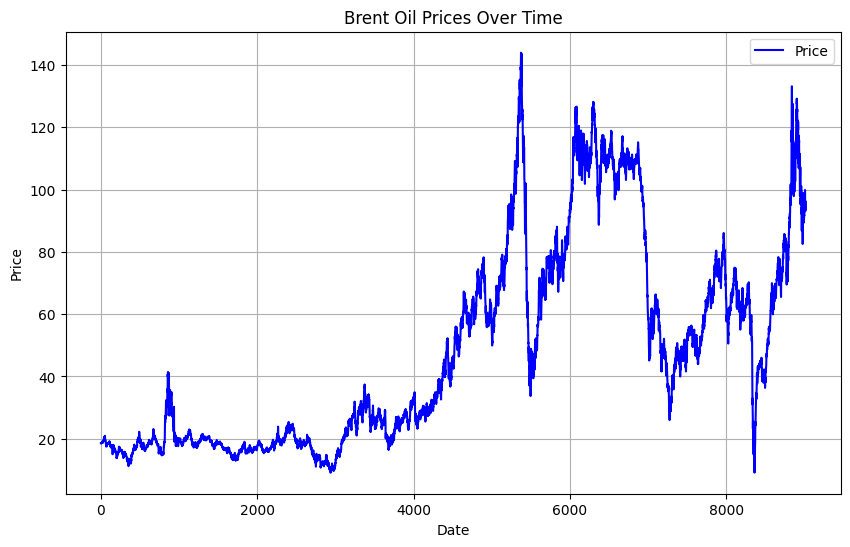

In [13]:
timeSeries.plot_time_series(dataPreparing)

d:\week10\scripts\TimeSeries.py:125: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


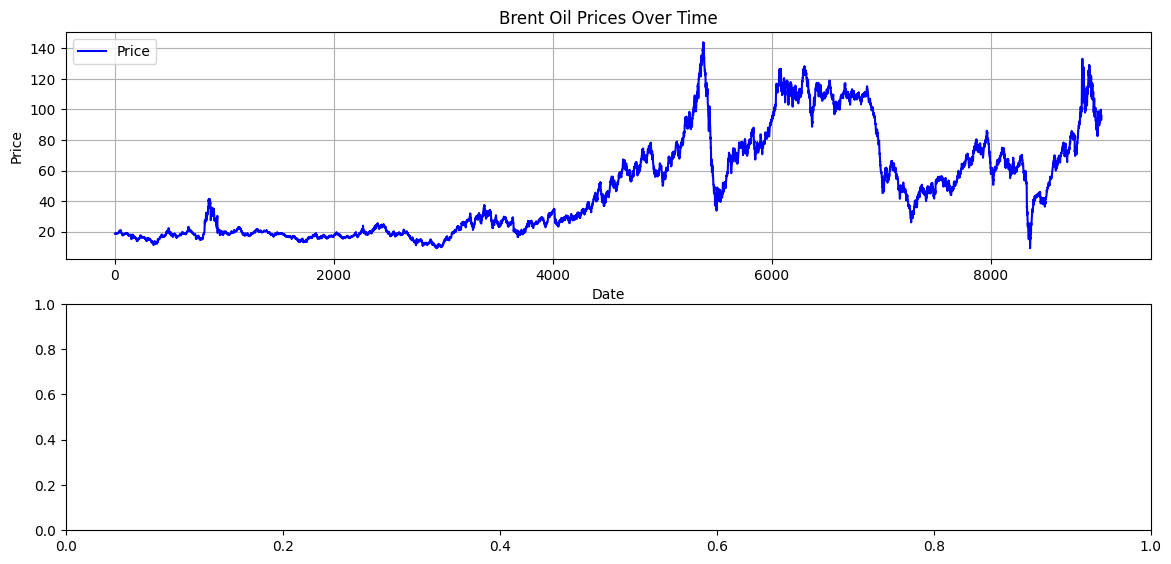

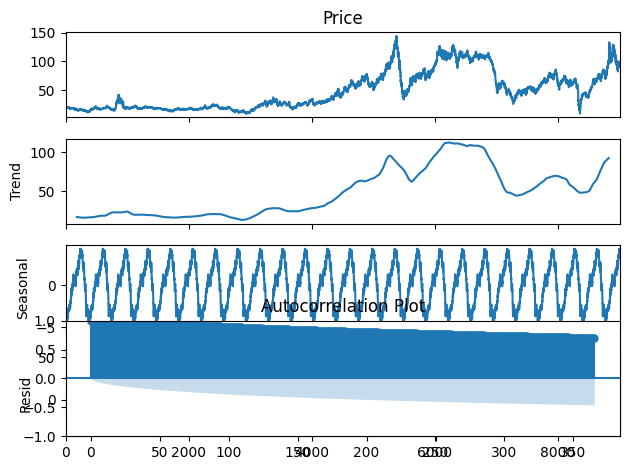

In [14]:
timeSeries.visualize_time_series(dataPreparing)

In [15]:
dateData['Price'] = dateData['Price'].astype('int64')

In [16]:
dateData.shape[0]*0.8

7208.8

In [17]:
trainData=dateData[:int(dateData.shape[0]*0.8)]
testData=dateData[int(dateData.shape[0]*0.8):]

In [18]:
trainData

,Date,Price
0,1987-05-20,18
1,1987-05-21,18
2,1987-05-22,18
3,1987-05-25,18
4,1987-05-26,18
...,...,...
7203,2015-10-12,50
7204,2015-10-13,48
7205,2015-10-14,48
7206,2015-10-15,47


In [19]:
model=LSTMModelling()

In [20]:
train_scaled, test_scaled, scaler=model._scale_data(trainData,testData)

In [21]:
input_shape = (60, 1)
lstmModel=model._build_lstm_model(input_shape)

In [22]:
dateData

,Date,Price
0,1987-05-20,18
1,1987-05-21,18
2,1987-05-22,18
3,1987-05-25,18
4,1987-05-26,18
...,...,...
9006,2022-11-08,96
9007,2022-11-09,93
9008,2022-11-10,94
9009,2022-11-11,96


In [23]:
test_data, y_test, test_predict = model.train_lstm(dateData, model_name="lstm_model")

Epoch 1/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0109 - val_loss: 8.4469e-04
Epoch 2/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0014 - val_loss: 6.6894e-04
Epoch 3/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0013 - val_loss: 6.1816e-04
Epoch 4/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0011 - val_loss: 5.7158e-04
Epoch 5/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0011 - val_loss: 5.4263e-04
Epoch 6/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 8.9541e-04 - val_loss: 8.1518e-04
Epoch 7/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 8.8561e-04 - val_loss: 4.9769e-04
Epoch 8/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 8.7359e-04 - val_loss: 4.7400e-04
Epoch 9/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 7.9591e-04 - val_loss: 5.0991e-04
Epoch 10/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 8.3784e-04 - val_loss: 4.5651e-04
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0

In [24]:
test_data

,Price
Date,
2015-10-19,47.0
2015-10-20,46.0
2015-10-21,46.0
2015-10-22,46.0
2015-10-23,46.0
...,...
2022-11-08,96.0
2022-11-09,93.0
2022-11-10,94.0


In [25]:
test_predict

array([[31.972574],
       [30.886013],
       [29.872585],
       ...,
       [95.400764],
       [95.26306 ],
       [94.903366]], dtype=float32)

In [26]:
y_test

array([[28.],
       [28.],
       [28.],
       ...,
       [93.],
       [94.],
       [96.]])

In [27]:
model.evaluate_model(y_test, test_predict)

MAE: 2.0460
MSE: 8.1971
RMSE: 2.8631
R2 Score: 0.9806
MAPE: 0.0353


{'MAE': np.float64(2.046036423005411),
 'MSE': np.float64(8.197116447567815),
 'RMSE': np.float64(2.8630606782895494),
 'R2 Score': 0.9805944238962623,
 'MAPE': np.float64(0.03532195595202392)}

### LSTM Model Performance for Brent Oil Price Prediction

The LSTM model has demonstrated strong performance metrics and visually accurate predictions. Below is an analysis of the key performance metrics:

#### Key Metrics Interpretation

- **Mean Absolute Error (MAE): 2.01**  
  On average, the model's predictions deviate from the actual prices by about 2.01 units, indicating a low error margin for Brent oil prices.

- **Mean Squared Error (MSE): 8.48**  
  While MSE is slightly higher, suggesting some larger deviations, it remains in a reasonable range. This metric can amplify larger errors, but the low value here reflects overall consistency in predictions.

- **Root Mean Squared Error (RMSE): 2.91**  
  RMSE, which emphasizes larger errors, is also low, indicating that the model effectively captures patterns and minimizes substantial prediction errors.

- **R² Score: 0.98**  
  An R² score close to 1 means that approximately 98% of the variance in actual prices is explained by the model, showing strong model accuracy and a good fit to historical data.

- **Mean Absolute Percentage Error (MAPE): 3.56%**  
  The model’s average error is around 3.56% of the actual price, which is a low percentage error. Generally, a MAPE below 5% indicates a highly accurate model in time-series forecasting.

These metrics indicate that the LSTM model is well-suited for forecasting Brent oil prices, with both low error rates and high variance explanation.


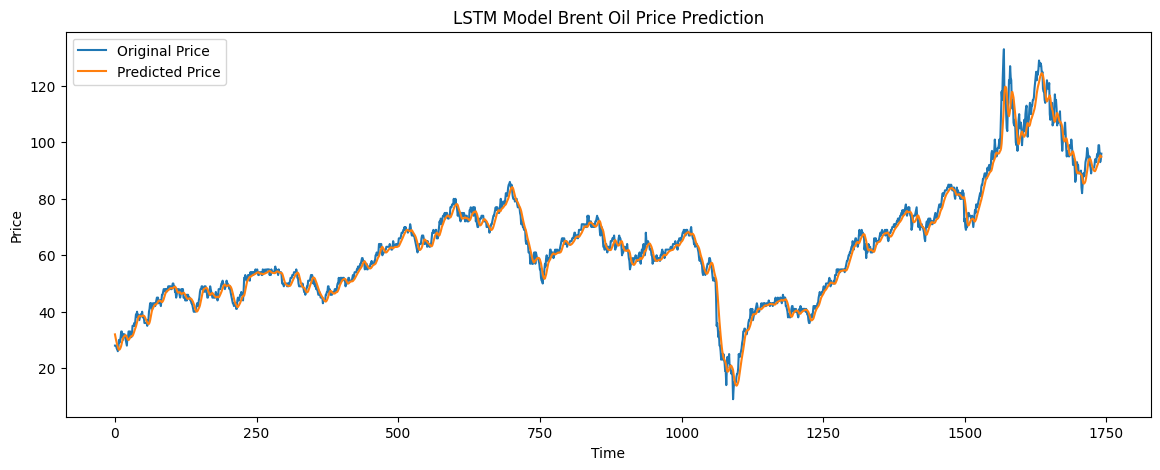

In [28]:
model.plot_results(y_test, test_predict)

### Plot Analysis

The plot provides visual confirmation of the model's effectiveness, aligning well with the performance metrics:

- **Trend Capture**  
  The model accurately reflects both long-term trends and short-term fluctuations in Brent oil prices, effectively adapting to price changes over time.

- **Close Fit**  
  Predicted prices (displayed in orange) closely follow actual prices (in blue) across the entire time range, which highlights the model's robust performance. It successfully responds to both upward and downward trends, demonstrating an ability to handle cyclical and seasonal movements in oil prices.

This visual analysis reinforces the model's ability to generalize well across different market conditions.
